# Fourier transforms of Dirac combs and of combinations of them

## Import stuff

In [1]:
import numpy as np
from numpy import fft as fft
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.special import erf

In [2]:
import sys
sys.path.append('../packages/')
from auxiliary import *
from normal_distribution import *
from grating2 import *

## Show comb FFT

In [7]:
# Define golden mean
golden = (1. + 5. ** 0.5) / 2.
print(golden)

1.618033988749895


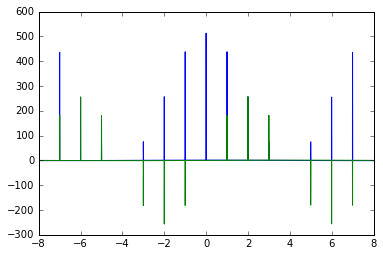

In [21]:
xres = 4096
xmin = 0.
xmax = 256.
x    = np.linspace(xmin, xmax, xres)
f    = fft.fftshift(fft.fftfreq(xres, x[1]-x[0]))

period = 1.
#offset = 0.875
offset = 0.875


fct_comb_1 = make_comb(period, x[1]-x[0])
fct_comb_2 = lambda x : make_comb(period, x[1]-x[0])(x-offset)
fct_combs  = lambda x : fct_comb_1(x) + fct_comb_2(x)

g_combs = fct_combs(x)
G_combs = fft.fftshift(fft.fft(g_combs))

plot_complex(f, G_combs, angl=False, abso=False)

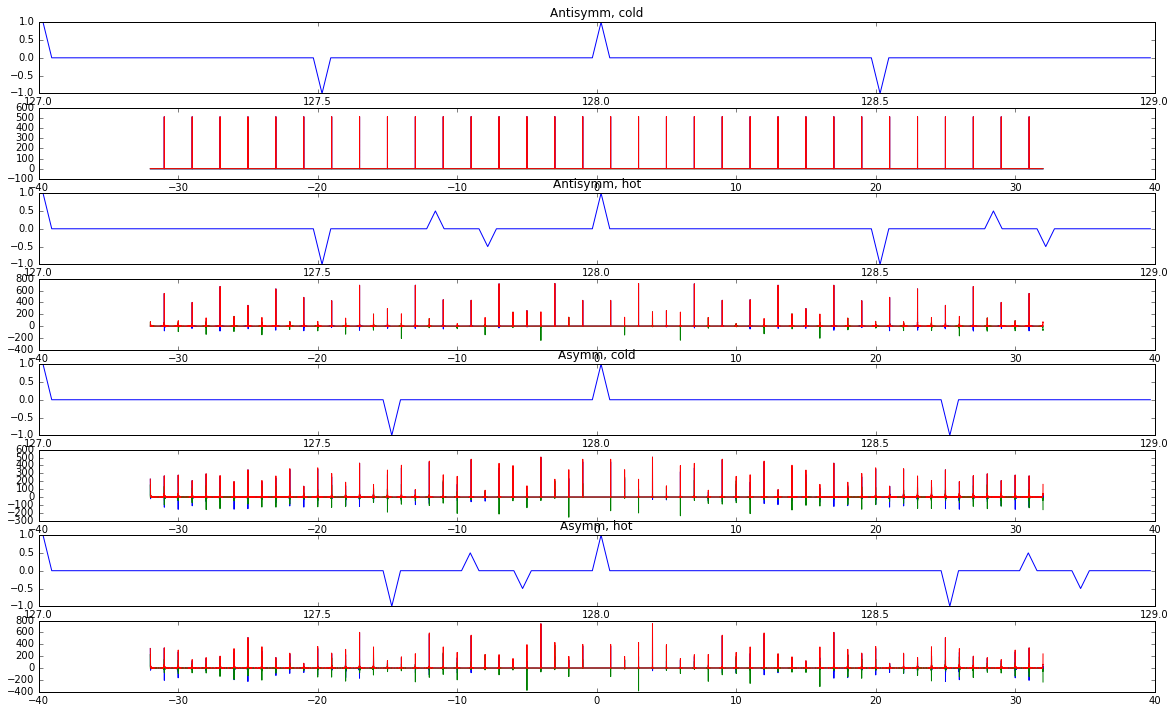

In [6]:
# Define delta double comb
xres = 16384
xmin = 0.
xmax = 256
x    = np.linspace(xmin, xmax, xres)
f = fft.fftshift(fft.fftfreq(xres, x[1]-x[0]))

# Antisymmetrical, cold
pitch = 1.
fsize = 1./2

fct_antisymm_cold_comb = lambda x : 1.*make_comb(pitch, x[1]-x[0])(x) - 1.*make_comb(pitch, x[1]-x[0])(x-fsize)

g_antisymm_cold_comb = fct_antisymm_cold_comb(x)
G_antisymm_cold_comb = fft.fftshift(fft.fft(g_antisymm_cold_comb))

# Asymmetrical, cold
pitch = 1.
fsize = 1./golden

fct_asymm_cold_comb = lambda x : 1.*make_comb(pitch, x[1]-x[0])(x) - 1.*make_comb(pitch, x[1]-x[0])(x-fsize)

g_asymm_cold_comb = fct_asymm_cold_comb(x)
G_asymm_cold_comb = fft.fftshift(fft.fft(g_asymm_cold_comb))

# Antisymmetrical, hot
pitch  = 1.
fsize  = 1./2
height = 0.5
width  = 0.1

fct_antisymm_hot_comb = lambda x :\
    1.        * make_comb(pitch, x[1]-x[0])(x) +\
    (-1.)     * make_comb(pitch, x[1]-x[0])(x-fsize) + \
    height    * make_comb(pitch, x[1]-x[0])(x-0.5*(fsize+pitch)+0.5*width) +\
    (-height) * make_comb(pitch, x[1]-x[0])(x-0.5*(fsize+pitch)-0.5*width)
    
g_antisymm_hot_comb = fct_antisymm_hot_comb(x)
G_antisymm_hot_comb = fft.fftshift(fft.fft(g_antisymm_hot_comb))


# Asymmetrical, hot
pitch  = 1.
fsize  = 1./golden
height = 0.5
width  = 0.1

fct_asymm_hot_comb = lambda x :\
    1.        * make_comb(pitch, x[1]-x[0])(x) +\
    (-1.)     * make_comb(pitch, x[1]-x[0])(x-fsize) + \
    height    * make_comb(pitch, x[1]-x[0])(x-0.5*(fsize+pitch)+0.5*width) +\
    (-height) * make_comb(pitch, x[1]-x[0])(x-0.5*(fsize+pitch)-0.5*width)
    
g_asymm_hot_comb = fct_asymm_hot_comb(x)
G_asymm_hot_comb = fft.fftshift(fft.fft(g_asymm_hot_comb))


# Plot
nxplot = 128
nxidcs = ((xres-nxplot)//2,(xres+nxplot)//2)

fig = plt.figure(figsize=(20, 12))

sub1 = fig.add_subplot(8, 1, 1)
sub1.set_title('Antisymm, cold')
sub1.plot(x[nxidcs[0]:nxidcs[1]], g_antisymm_cold_comb[nxidcs[0]:nxidcs[1]])

sub2 = fig.add_subplot(8, 1, 2)
plot_complex(f, G_antisymm_cold_comb, axes=sub2, angl=False)

sub3 = fig.add_subplot(8, 1, 3)
sub3.set_title('Antisymm, hot')
sub3.plot(x[nxidcs[0]:nxidcs[1]], g_antisymm_hot_comb[nxidcs[0]:nxidcs[1]])

sub4 = fig.add_subplot(8, 1, 4)
plot_complex(f, G_antisymm_hot_comb, axes=sub4, angl=False)

sub5 = fig.add_subplot(8, 1, 5)
sub5.set_title('Asymm, cold')
sub5.plot(x[nxidcs[0]:nxidcs[1]], g_asymm_cold_comb[nxidcs[0]:nxidcs[1]])

sub6 = fig.add_subplot(8, 1, 6)
plot_complex(f, G_asymm_cold_comb, axes=sub6, angl=False)

sub7 = fig.add_subplot(8, 1, 7)
sub7.set_title('Asymm, hot')
sub7.plot(x[nxidcs[0]:nxidcs[1]], g_asymm_hot_comb[nxidcs[0]:nxidcs[1]])

sub8 = fig.add_subplot(8, 1, 8)
plot_complex(f, G_asymm_hot_comb, axes=sub8, angl=False)